# Checking if 3D-Maze dataset is not lipschitz 
    

In [5]:
import gym
import numpy as np
import os 
import pickle
os.environ['MUJOCO_GL'] = 'glfw'  
def load_maze_data(filename):
    with open(filename, 'rb') as file:
        data = pickle.load(file)
    return data

# Usagemaze_data_CIRCLE_10000.pkl
data = load_maze_data('3d_maze_dataset_walking_around.pkl')
images = data['images']
layouts = data['maze_layout']
positions = data['positions']
directions = data['directions']

layouts[26]

array([[1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0]], dtype=uint8)

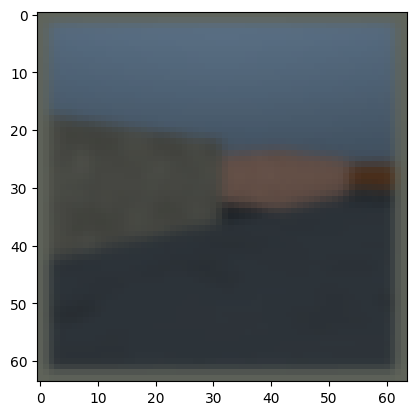

In [6]:
# Testing Gaussian Blur 

from scipy import ndimage
from imageio import imread, imwrite
import matplotlib.pyplot as plt  # Add this line

# Read the image
image = images[1]

# Define the standard deviation
sigma = 1  # Example standard deviation

# Apply Gaussian Blur
blurred_image = ndimage.gaussian_filter(image, sigma=sigma)

plt.imshow(blurred_image)
plt.show()


In [7]:
import cv2
import numpy as np

def compute_l2_norm(img1, img2):
    # Read the images
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
    l2_norm = np.sqrt(np.sum((img1.astype("float") - img2.astype("float")) ** 2))
    return l2_norm



l2_norm = compute_l2_norm(images[2], images[1])
print("L2 Norm between the two images is:", l2_norm)

L2 Norm between the two images is: 0.0


In [8]:
import math

def direction_to_angle(direction): # The game engine encodes the direction as 2 numbers not as an angle 
        dx, dy = direction  # Assuming direction is a tuple (dx, dy)
        angle_radians = math.atan2(dy, dx)
        angle_degrees = math.degrees(angle_radians)
        return angle_degrees # -180 to 180

for i in range(0,4):
        direction = (directions[i][0], directions[i][1])  
        angle = direction_to_angle(direction)
        print("Angle in deg: ",angle)
        print("position: ",positions[i][0],positions[i][1])

Angle in deg:  -135.14967701628294
position:  8.5 3.5
Angle in deg:  -135.14967701628294
position:  8.5 3.5
Angle in deg:  -135.14967701628294
position:  8.5 3.5
Angle in deg:  -135.14967701628294
position:  8.5 3.5


In [17]:
#Finding largest angle/pos diff in dateset

def normalized_distance(x1, y1, x2, y2, direction1, direction2): #Gives back a number between 0 and 1 

        dx, dy = direction1  # Assuming direction is a tuple (dx, dy)
        angle_radians = math.atan2(dy, dx)
        angle_degrees1 = (math.degrees(angle_radians) + 180) / 360

        dx, dy = direction2  # Assuming direction is a tuple (dx, dy)
        angle_radians = math.atan2(dy, dx)
        angle_degrees2 = (math.degrees(angle_radians) + 180) / 360

        angle_dist = abs(angle_degrees1 - angle_degrees2)

        pos_dist = math.sqrt((x1/9-x2/9)**2 + (y1/9-y2/9)**2)

        #print("angle_dist",angle_dist)
        #print("pos_dist",pos_dist)

        total_dist = pos_dist + angle_dist   / 2 
        return total_dist

        
                     
def normalized_L2_Norm(img1,img2):

        # Apply Gaussian Blur
        sigma = 1
        blurred_image1 = ndimage.gaussian_filter(img1, sigma=sigma)
        blurred_image2 = ndimage.gaussian_filter(img2, sigma=sigma)
        # Upper bound = 64*64*3*255^2 = 799027200

        l2_norm = np.sqrt(np.sum((blurred_image1.astype("float") - blurred_image2.astype("float")) ** 2))
        return l2_norm / 799027200

# Calculating the norms for first N images 
plot_norms = []
N = 100
for i in range(0,N):
        for j in range(i+1,N):
                dist_ang_norm = normalized_distance(positions[i][0],positions[j][0],positions[i][1],positions[j][1], (directions[i][0], directions[i][1]), (directions[j][0], directions[j][1]))
                print("dist and angle Norm: ",dist_ang_norm)
                
                L2_norm = normalized_L2_Norm(images[i],images[j])
                print("L2 Norm:", L2_norm)
                plot_norms.append([dist_ang_norm,L2_norm,i,j])

plot_norms




dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1.4808206236532664e-08
dist and angle Norm:  0.7856742013183862
L2 Norm: 1

[[0.7856742013183862, 1.4808206236532664e-08, 0, 1],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 2],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 3],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 4],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 5],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 6],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 7],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 8],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 9],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 10],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 11],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 12],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 13],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 14],
 [0.7856742013183862, 1.4808206236532664e-08, 0, 15],
 [0.8052666697905256, 1.2565497521581055e-06, 0, 16],
 [0.8271315938712834, 1.6357237377746488e-06, 0, 17],
 [0.8187309953048262, 1.695837969031688e-06, 0, 18],
 [0.8037383611842863, 1.73159253465711

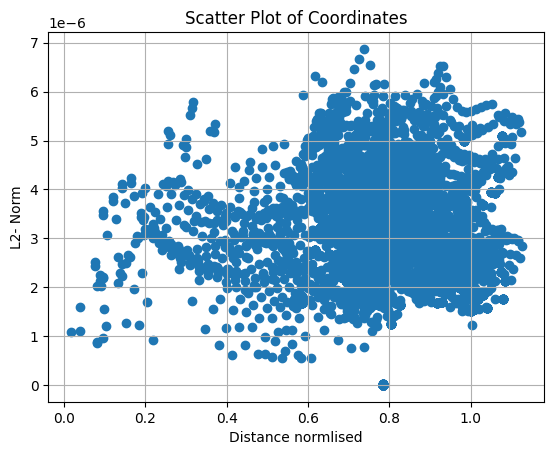

In [18]:
# Separating the coordinates into x and y lists
x = [coord[0] for coord in plot_norms]
y = [coord[1] for coord in plot_norms]

# Creating a scatter plot
plt.scatter(x, y)
plt.title('Scatter Plot of Coordinates')
plt.xlabel('Distance normlised')
plt.ylabel('L2- Norm')
plt.grid(True)
plt.show()

# Images with small distance but large L2 norm

0.14262701946644796 4.107421879082726e-06
35 42
0.14264771394328718 4.0200935187674045e-06
35 43
0.11970990065112465 3.851165582628085e-06
36 42
0.11973455610344987 3.768561516015576e-06
36 43
0.09683418790659298 3.5568136497709896e-06
37 42
x,y im1:  [4.04802076 2.76846445]
x,y im2:  [2.38427802 2.28192882]
Angle im1:  -170.8832060427288
Angle im2:  -170.8832086813034


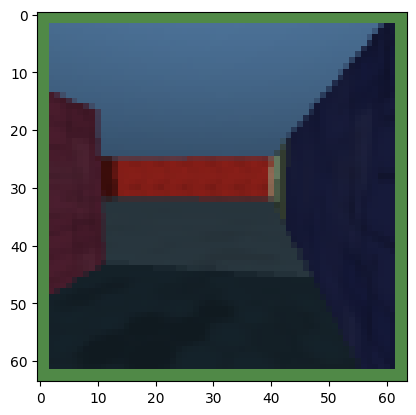

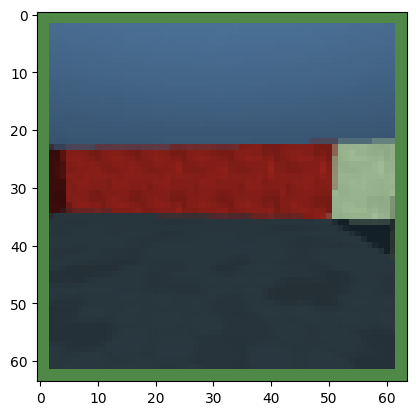

x,y im1:  [4.04802076 2.76846445]
x,y im2:  [2.13770009 2.24235931]
Angle im1:  -170.8832060427288
Angle im2:  -170.88320868137146


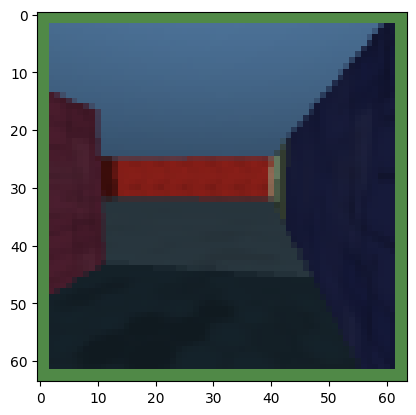

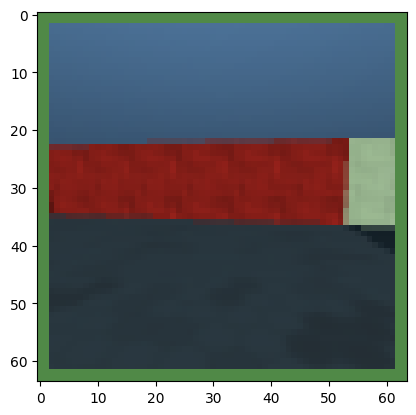

x,y im1:  [3.80140555 2.72888895]
x,y im2:  [2.38427802 2.28192882]
Angle im1:  -170.8832060427288
Angle im2:  -170.8832086813034


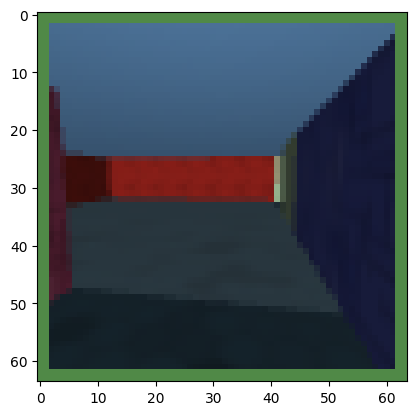

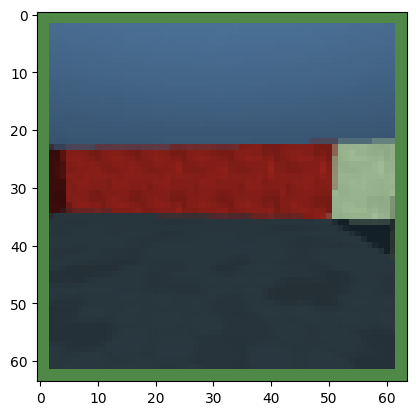

x,y im1:  [3.80140555 2.72888895]
x,y im2:  [2.13770009 2.24235931]
Angle im1:  -170.8832060427288
Angle im2:  -170.88320868137146


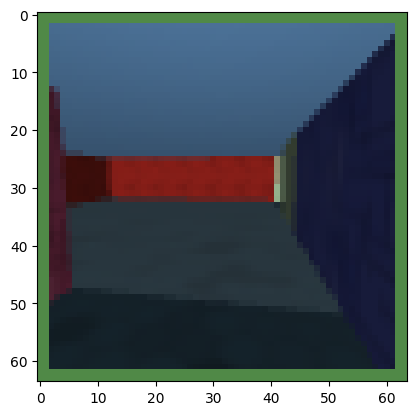

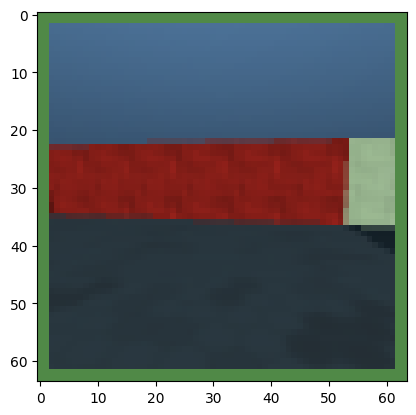

x,y im1:  [3.55479033 2.68931345]
x,y im2:  [2.38427802 2.28192882]
Angle im1:  -170.8832060427288
Angle im2:  -170.8832086813034


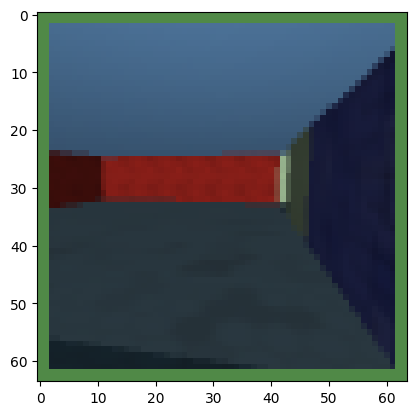

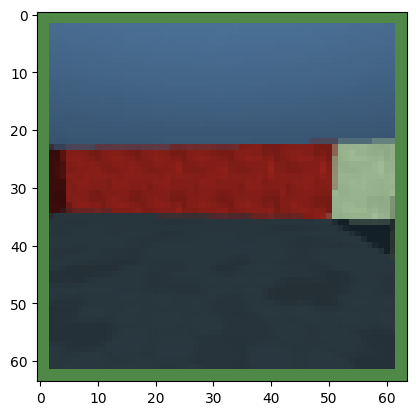

In [19]:

#large diffrence: 


large_deviations = []

for x in plot_norms:
    if x[0]< 0.15 and x[1] > 0.35 * 10**-5:
        print(x[0],x[1])
        print(x[2],x[3])
        large_deviations.append([x[2],x[3]])


for i in range(0,len(large_deviations)):
    import matplotlib.pyplot as plt

    print("x,y im1: ", positions[large_deviations[i][0]])
    print("x,y im2: ", positions[large_deviations[i][1]])

    print("Angle im1: ", direction_to_angle( (directions[large_deviations[i ][0]][0],directions[large_deviations[i ][0]][1])) )
    print("Angle im2: ", direction_to_angle(directions[large_deviations[i ][1]]))
    plt.imshow(images[large_deviations[i ][0]])
    plt.show()
    plt.imshow(images[large_deviations[i ][1]])
    plt.show()


# Images with similar L2 Norm but large diffrence in dataset

1.0042333525321028 1.2324313367372926e-06
16 70
x,y im1:  [8.49995183 3.49995933]
x,y im2:  [0.6766066  5.03920971]
Angle im1:  -149.25667838458176
Angle im2:  42.93704442072011


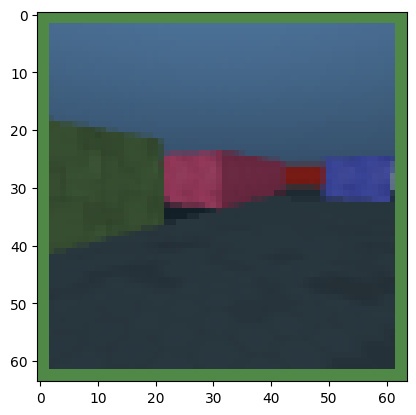

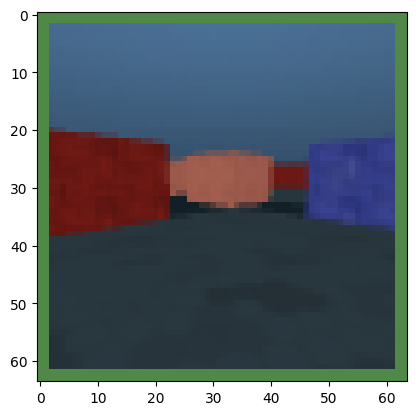

In [22]:

#large diffrence: 


large_deviations = []

for x in plot_norms:
    if x[0]> 0.9 and x[1] < 0.15 * 10**-5:
        print(x[0],x[1])
        print(x[2],x[3])
        large_deviations.append([x[2],x[3]])


for i in range(0,len(large_deviations)):
    import matplotlib.pyplot as plt

    print("x,y im1: ", positions[large_deviations[i][0]])
    print("x,y im2: ", positions[large_deviations[i][1]])

    print("Angle im1: ", direction_to_angle( (directions[large_deviations[i ][0]][0],directions[large_deviations[i ][0]][1])) )
    print("Angle im2: ", direction_to_angle(directions[large_deviations[i ][1]]))
    plt.imshow(images[large_deviations[i ][0]])
    plt.show()
    plt.imshow(images[large_deviations[i ][1]])
    plt.show()
    
